## EDA
1.  Descriptive stats
	- Measure of Central tendency
	- Distribution of Data
	- Measure of Dispersion
2.  Univariate Analysis - Bar chart, Histogram, Pie chart, Line chart
3.  Multivariate Analysis
4.  Handling Non-Numeric Data(Encoding)(https://medium.com/wicds/label-and-one-hot-encoding-61525a32b99c)
    - Label Encoding (Ordinal Variables - hierarchical) 
    - One Hot Encoding / Dummy Encoding (Nominal Data - No ranks)
5.  Feature Scaling (https://www.kaggle.com/code/aimack/complete-guide-to-feature-scaling)
    - Standard Scalar (Standardization)
    - MinMax Scalar (Normalization)
6.  Data Transformation(https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/)
    - Log transformation
    - Power transformation
        - Box cox transform
        - The Yeo Johnson transform
7.  Data Type conversion
8.  Bivariate Analysis(https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/)
	- Num vs Num - Scatter plot
	- Num vs Cat - Grouped boxplot, Violin plot, 
	- Cat vs Cat - histplot
9.  Missing Value Treatment
	- Imputations
10. Outlier Treatment
	- Z score
	- IQR
11. Feature Engineering
12. Train Test Split

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.shape

(2845342, 47)

In [6]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
round(df.describe())

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2845342.0,2845342.0,2845342.0,2845342.0,2845342.0,2845342.0,1101431.0,2776068.0,2375699.0,2772250.0,2786142.0,2774796.0,2687398.0,2295884.0
mean,2.0,36.0,-97.0,36.0,-97.0,1.0,8089.0,62.0,60.0,64.0,29.0,9.0,7.0,0.0
std,0.0,5.0,18.0,5.0,18.0,2.0,18360.0,19.0,21.0,23.0,1.0,3.0,6.0,0.0
min,1.0,25.0,-125.0,25.0,-125.0,0.0,0.0,-89.0,-89.0,1.0,0.0,0.0,0.0,0.0
25%,2.0,33.0,-118.0,33.0,-118.0,0.0,1270.0,50.0,46.0,48.0,29.0,10.0,4.0,0.0
50%,2.0,36.0,-92.0,36.0,-92.0,0.0,4007.0,64.0,63.0,67.0,30.0,10.0,7.0,0.0
75%,2.0,40.0,-80.0,40.0,-80.0,1.0,9567.0,76.0,76.0,83.0,30.0,10.0,10.0,0.0
max,4.0,49.0,-67.0,49.0,-67.0,155.0,9999997.0,196.0,196.0,100.0,59.0,140.0,1087.0,24.0


In [13]:
numerics = ['int16', 'int32', 'int64','float16','float32','float64']
df_num = df.select_dtypes(include=numerics)

In [14]:
df_num.shape

(2845342, 14)

In [21]:
df.isnull().sum().sort_values(ascending=True)/len(df)*100

ID                        0.000000
Crossing                  0.000000
Give_Way                  0.000000
Junction                  0.000000
No_Exit                   0.000000
Railway                   0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Traffic_Signal            0.000000
Turning_Loop              0.000000
Country                   0.000000
Amenity                   0.000000
State                     0.000000
End_Lng                   0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
County                    0.000000
Bump                      0.000000
Description               0.000000
Side                      0.000000
Distance(mi)              0.000000
Street                    0.000070
City                

In [22]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Analysing few imp cols

In [25]:
Cities = df.City.nunique()

In [28]:
cities_by_accident = df.City.value_counts()
cities_by_accident.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [29]:
'New York' in df.City

False

In [30]:
'NY' in df.State

False

<AxesSubplot:>

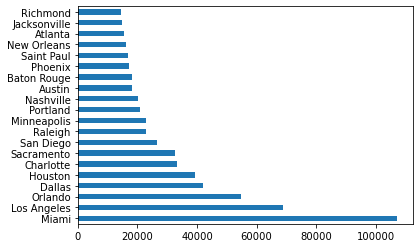

In [32]:
cities_by_accident[:20].plot(kind='barh')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

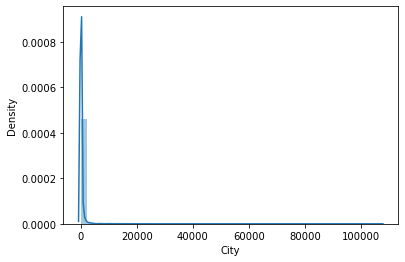

In [33]:
sns.distplot(cities_by_accident)

In [34]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [35]:
len(high_accident_cities)

496

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

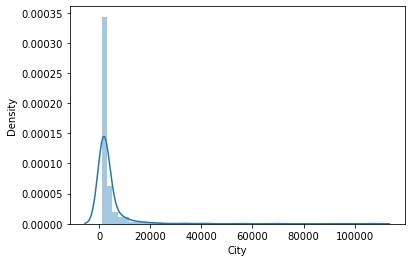

In [37]:
sns.distplot(high_accident_cities)

In [36]:
len(low_accident_cities)

11185

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

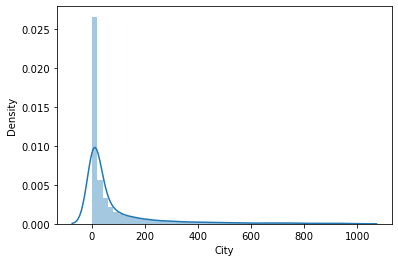

In [39]:
sns.distplot(low_accident_cities)

In [41]:
cities_by_accident[cities_by_accident == 1].value_counts()

1    1110
Name: City, dtype: int64

In [42]:
cities_by_accident[cities_by_accident == 2].value_counts()

2    819
Name: City, dtype: int64

In [47]:
cities_by_accident[cities_by_accident == 10].value_counts()

10    200
Name: City, dtype: int64

In [49]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [50]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [53]:
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

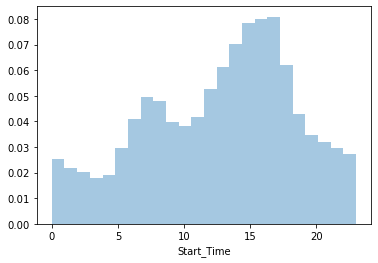

In [60]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist =True)

<AxesSubplot:xlabel='Start_Time'>

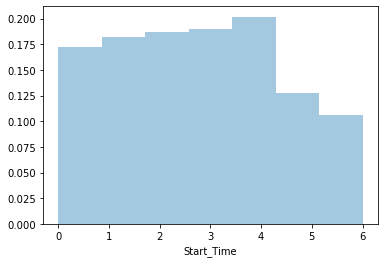

In [61]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7,kde=False, norm_hist =True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

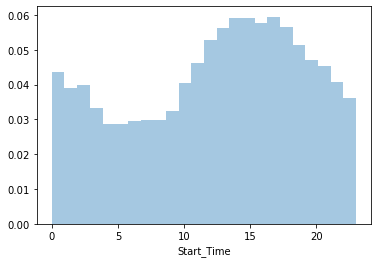

In [65]:
sunday = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday.dt.hour, bins=24, kde=False, norm_hist =True)

<AxesSubplot:xlabel='Start_Time'>

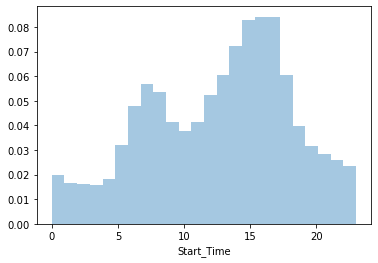

In [66]:
monday = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday.dt.hour, bins=24, kde=False, norm_hist =True)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

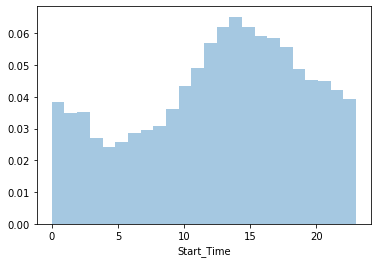

In [67]:
satday = df.Start_Time[df.Start_Time.dt.dayofweek == 5]
sns.distplot(satday.dt.hour, bins=24, kde=False, norm_hist =True)

<AxesSubplot:xlabel='Start_Time'>

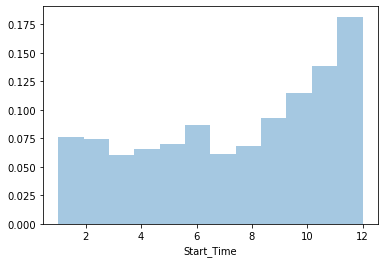

In [69]:
sns.distplot(df.Start_Time.dt.month, bins=12,kde=False, norm_hist =True)

In [79]:
df_2020 = df[df.Start_Time.dt.year == 2020]

<AxesSubplot:xlabel='Start_Time'>

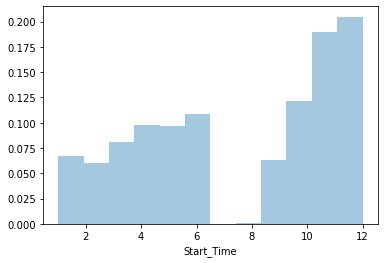

In [80]:
sns.distplot(df_2020.Start_Time.dt.month, bins=12,kde=False, norm_hist =True)

<AxesSubplot:xlabel='Start_Time'>

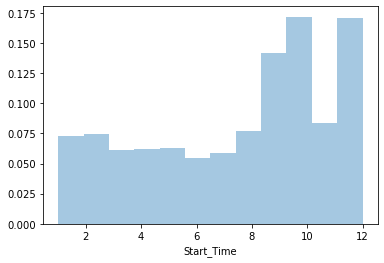

In [82]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12,kde=False, norm_hist =True)

In [84]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

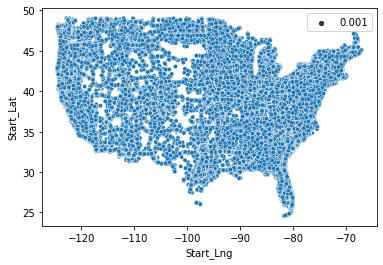

In [89]:
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat, size=0.001)